In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bike_df = pd.read_csv('./bike_train.csv')
print(bike_df.shape)
bike_df.head(5)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
# pd.to_datetime 함수를 통해 Object를 datetime 타입으로 변경

bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
# 새롭게 year, month, day, hour, calumn들을 생성
display(bike_df.head(5))
bike_df.info()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [4]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)
bike_df.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
5,1,0,0,2,9.84,12.880,75,6.0032,1,2011,1,1,5
6,1,0,0,1,9.02,13.635,80,0.0000,2,2011,1,1,6
7,1,0,0,1,8.20,12.880,86,0.0000,3,2011,1,1,7
8,1,0,0,1,9.84,14.395,75,0.0000,8,2011,1,1,8
9,1,0,0,1,13.12,17.425,76,0.0000,14,2011,1,1,9


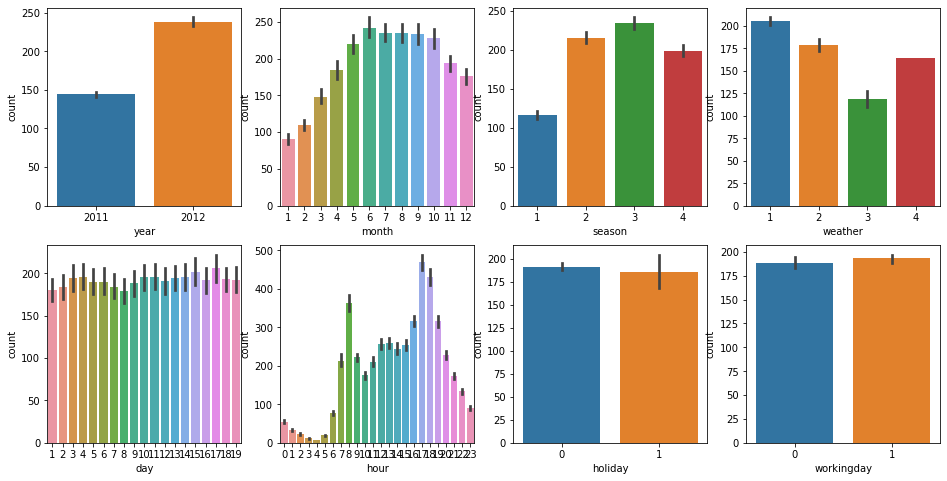

In [5]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 평균값을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# log 값 변환 시 NaN, 음수등의 이슈로 log() 가 아닌 log1p() 를 이용
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MAE, RMSE, RMSLE 를 모두 계산하는 함수
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [7]:

import numpy as np

print(1e-1000 == 0.0)

print(np.log(1e-1000))

print(np.log(1e-1000 + 1))
print(np.log1p(1e-1000))

True
-inf
0.0
0.0


C:\Users\user\AppData\Local\Temp\ipykernel_9736\4001705799.py:5: RuntimeWarning: divide by zero encountered in log
  print(np.log(1e-1000))


In [8]:
var_1 = np.log1p(100)
var_2 = np.expm1(var_1)
print(var_1, var_2)

4.61512051684126 100.00000000000003


### 로그 변환, 피처 인코딩, 모델 학습/예측/평가

In [9]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso, ElasticNet

# Count feature를 y_target, count를 뺀 나머지를 X_features로 나눠주고 inplace-False로 원본 데이터는 수정안함
y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

# 30%를 테스트 셋으로 설정 random_state = seed값 -> 아무 값 설정해줘도 됨
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [10]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


C:\Users\user\AppData\Local\Temp\ipykernel_9736\3555413417.py:6: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [11]:
y_target.sort_values()

352       1
5495      1
1611      1
140       1
575       1
       ... 
9896    943
9752    948
9297    968
9320    970
9345    977
Name: count, Length: 10886, dtype: int64

In [12]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값의 차이를 내림차순으로 정렬. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

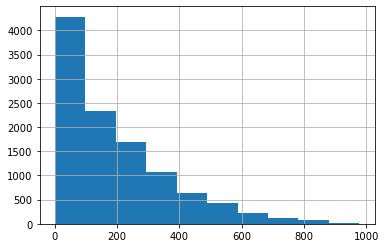

In [13]:
y_target.hist()

<AxesSubplot:>

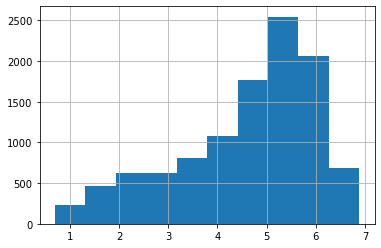

In [14]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [15]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log로 학습/테스트 데이터 셋 분할하고 적용
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용해 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


In [16]:
print(lr_reg.coef_)
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef.sort_values(ascending=False)

[-0.04452494 -0.04601019 -0.06638329 -0.01473326  0.01171224  0.03085662
 -0.01451151  0.00396076  0.41851292  0.07683909  0.0033531   0.09834835]


year          0.418513
hour          0.098348
month         0.076839
atemp         0.030857
temp          0.011712
windspeed     0.003961
day           0.003353
humidity     -0.014512
weather      -0.014733
season       -0.044525
holiday      -0.046010
workingday   -0.066383
dtype: float64

<AxesSubplot:>

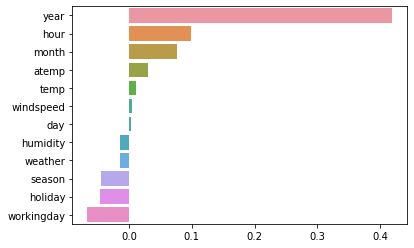

In [17]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [18]:
# get_dummies 함수를 통해 원핫 인코딩 작업
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])
X_features_ohe.head(5)

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [19]:
import time
# 다시 학습 과 테스트 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 지금까지 한 것 전부 함수로 정리하고 실행할 수 있게 제작
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###') # class name을 참조하기 위해
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10) # alpha값 설정을 바꾸면서 성능평가 확인해봐도 됨 L2 규제 모델
lasso_reg = Lasso(alpha=0.01) # L1 규제 모델
elast_reg = ElasticNet(alpha=1.0, l1_ratio=0.7) # L1 : L2 = 7 : 3

start = time.time()
for model in [lr_reg, ridge_reg, lasso_reg, elast_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True) # 함수 실행
print("걸린 시간 :", round(time.time() - start,3))

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803
### ElasticNet ###
RMSLE: 1.236, RMSE: 176.510, MAE: 120.676
걸린 시간 : 0.064


<AxesSubplot:>

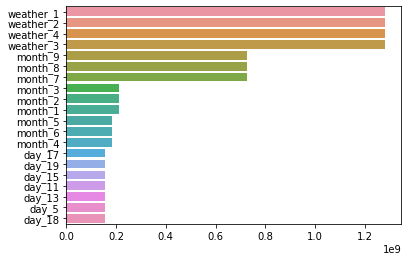

In [20]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [21]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import time

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

start = time.time()
for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)
print("걸린 시간 :", round(time.time() - start,3))

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 50.219, MAE: 31.100
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.334, MAE: 32.740
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029
걸린 시간 : 25.637


In [22]:
import tensorflow as tf
from keras.models import Model
from keras import Input, layers

# # Build Network
input_tensor = Input(shape=(X_train.shape[1],))
x = layers.Dense(80, activation='relu')(input_tensor)
x = layers.Dense(80, activation='relu')(x)
output_tensor = layers.Dense(1)(x)
nn_model = Model(input_tensor, output_tensor)
nn_model.summary()

# Compile and Fit
nn_model.compile(optimizer='adagrad', loss='msle')
history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=10)
pred_nn = nn_model.predict(X_test)

# # Convert back from Log_Count to Count
# pred = exp_transform(pred)
# y_val = exp_transform(y_val)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 73)]              0         
                                                                 
 dense (Dense)               (None, 80)                5920      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 12,481
Trainable params: 12,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
191/191 [==============================] - 1s 1ms/step - loss: 0.1160 - val_loss: 0.0998
Epoch 2/10
191/191 [==============================] - 0s 784us/step - loss: 0.1022 - val_

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


### NEURAL NETWORKS MODEL - adagrad ###
RMSLE: 0.300, RMSE: 1.390, MAE: 1.133


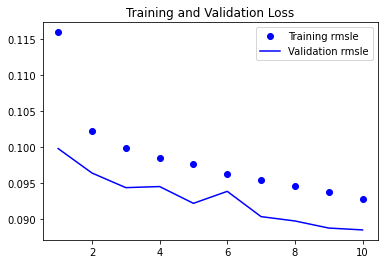

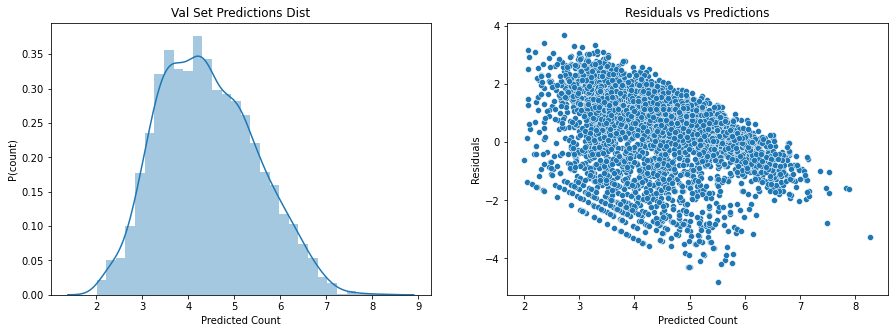

In [23]:
pred_nn = np.ravel(pred_nn) # 1차원으로 바꿔줌
pred_nn[pred_nn<0] = 0

# Plot Training and Validation MSLE
rmsle_train = history.history['loss']
rmsle_val = history.history['val_loss']
epochs = range(1, len(rmsle_train) + 1)
plt.figure()
plt.plot(epochs, rmsle_train, 'bo', label='Training rmsle')
plt.plot(epochs, rmsle_val, 'b', label='Validation rmsle')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Predictions and Residuals
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 5)

sns.distplot(pred_nn, ax=axes[0])
axes[0].set(xlabel='Predicted Count', ylabel='P(count)', title='Val Set Predictions Dist' )

residuals = (y_test - pred_nn)
sns.scatterplot(x=pred_nn, y=residuals, ax=axes[1])
axes[1].set(xlabel='Predicted Count', ylabel='Residuals', title='Residuals vs Predictions')

print('### NEURAL NETWORKS MODEL - adagrad ###')
evaluate_regr(y_test,pred_nn)

In [27]:
"""
계속 연구해보았을 때, ROC curve는 분류 문제에서 True, False를 구분할 수 있다.
회귀 문제에서는 ROC와 AUC를 구할 수 없다는 것을 이해하게 되었다.
이 아래 부터는 왜 error가 발생하는지를 참고하기 위해 만들어 놓았다.
요약하자면, bike_train.csv 파일의 output인 'count'가 연속형이기 때문에
TP, FP, TN, FN를 구할 수 없다. 따라서 TPR, FPR을 통해 ROC 그래프를 그릴 수 없다.
그래도 Randomforestclassifer를 구하려 했는데 시간이 부족해 못했다.
"""

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, classification_report

X_train, X_test, y_train, y_test = train_test_split(bike_df, y_target_log,
                                                    test_size=0.3, random_state=1)
model_lr = RandomForestClassifier()
model_lr = model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
f1 = f1_score(y_test, pred)
print('F1 score: {0:,4f}'.format(f1))

ValueError: continuous is not supported

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, classification_report

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()


model_rc = RandomForestClassifier()
model_rc.fit(X_train,y_train)
pred_rc= model.predict(X_test)
print(classification_report(y_test, pred_rc))
# fper, tper, threshold = roc_curve(y_test, pred_lor[:,1])
# plot_roc_curve(fper, tper)

ValueError: Unknown label type: 'continuous'

In [30]:
"""
여긴 neural network pruning을 하려고 한 곳이다.
pruning_params의 설정이 문제인 것으로 추측하고 있다.
"""

import tensorflow_model_optimization as tfmot
import tempfile

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
PolynomialDecay = tfmot.sparsity.keras.PolynomialDecay

pruning_params = {
      'pruning_schedule': PolynomialDecay(initial_sparsity=0.50,
                                             final_sparsity=0.80,
                                               begin_step=0,
                                               end_step=2000)
}
# pruning_params = {
#     'pruning_schedule': PolynomialDecay(initial_sparsity=0.2,
#         final_sparsity=0.8, begin_step=1000, end_step=2000),
#     'block_size': (2, 3),
#     'block_pooling_type': 'MAX'
# }

model_for_pruning = prune_low_magnitude(nn_model, **pruning_params)
model_for_pruning.compile(optimizer='adam', loss='msle')
model_for_pruning.summary()

model_for_pruning.fit(X_train, y_train, validation_split=0.2, epochs=10)
pred_nn = model_for_pruning.predict(X_test)

evaluate_regr(y_test,pred_nn)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 73)]              0         
                                                                 
 prune_low_magnitude_dense (  (None, 80)               11762     
 PruneLowMagnitude)                                              
                                                                 
 prune_low_magnitude_dense_1  (None, 80)               12882     
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_2  (None, 1)                163       
  (PruneLowMagnitude)                                            
                                                                 
Total params: 24,807
Trainable params: 12,481
Non-trainable params: 12,326
____________________________________________________

ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 73), found shape=(None, 13)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow_model_optimization as tfmot
from tensorflow.keras.layers import Dense, ReLU
model = tf.keras.Sequential()
model.add(Dense(80, kernel_initializer="he_normal", input_dim=input_tensor))
model.add(ReLU())
model.add(Dense(80))
model.add(ReLU())
model.add(Dense(1))


model = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)
pruning_callback = tfmot.sparsity.keras.UpdatePruningStep()

In [ ]:
# pruning code

import tensorflow_model_optimization as tfmot

model = nn_model
# model = MyModel()

pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(inital_sparsity = 0.0, final_sparsity = 0.5,
                                                        begin_step = 2000, end_step = 4000)
                
model_for_pruning = tfmot.sparsity.keras.prune_low_magnitude(model,pruning_schedule=pruning_schedule)

#final_sparsity는 각 레이어에서 weight를 얼마나 줄일것인지 0.5 = 50%